# First Practical Work

## Andres Navarro Pedregal
## NIA: 100451730

## Summary

In this practial work, we will be optimizing a portfolio of European ETF in order to maximize the projected return on investment given some fund contraints. This work will study different approaches for a fund allocation for different segments of the population like age groups, years to retire, goals, believes, etc. Moreover, we will make recommendation on the best approaches for them.

In order to perform the optimization, we will be using two methods:

1. The first method will consists on a continuous approach where we will try to maximize the percentage of ETFs to buy in order to get the maximum ROI. Moreover, we will add some constraints like the maximum risk, the maxium allocation in order to make a diversified portfolio and more.

2. And the second approach will add some binary varaibles in order to better fit the model to a real scenario such as only selecting a few funds or turning on or off different paramentes.

## Dataset

In order to study the different funds, we will be using a dataset consisting of all European ETFs given by MorningStar. It can be found here [link](https://www.kaggle.com/datasets/stefanoleone992/european-funds-dataset-from-morningstar). It is a dataset consisting of 9500 different funds with more than 132 entries (different types of performance analysis, returns, etc.)

In [1]:
import pandas as pd

data = pd.read_csv("ETFs.csv")
data

,ticker,isin,fund_name,inception_date,category,rating,analyst_rating,risk_rating,performance_rating,investment_strategy,...,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down
0,0P00000C5S,CH0008899764,iShares SMI® ETF (CH),1999-10-06,Switzerland Equity,3.0,Negative,3.0,3.0,The Fund aims to achieve a return on your inve...,...,1.45,5.10,10.47,-4.09,4.18,-4.00,-3.96,10.56,15,8
1,0P00000FYY,SE0000693293,XACT OMXS30 UCITS ETF,2000-10-30,Sweden Equity,2.0,NaN,2.0,2.0,The fund is an exchange-traded index fund and ...,...,5.21,11.32,1.66,1.43,4.99,-6.15,-7.21,10.11,16,7
2,0P00000GCE,DE000A0H08N1,iShares STOXX Europe 600 Personal & Household ...,2002-07-08,Sector Equity Consumer Goods & Services,3.0,NaN,3.0,3.0,iShares STOXX Europe 600 Personal & Household ...,...,-1.51,5.34,8.17,6.48,4.83,4.12,-2.03,9.24,17,6
3,0P00000GF2,DE0006289465,iShares eb.rexx® Government Germany UCITS ETF ...,2003-02-04,EUR Government Bond,2.0,NaN,2.0,2.0,iShares eb.rexx Government Germany (DE) is an ...,...,-2.14,4.21,6.04,9.67,0.05,4.96,-3.72,-5.67,13,10
4,0P00000GKU,IE0032523478,iShares € Corp Bond Large Cap UCITS ETF EUR (D...,2003-03-17,EUR Corporate Bond,3.0,NaN,3.0,3.0,The investment objective of this Fund is to pr...,...,-2.74,5.58,6.26,10.55,1.38,3.78,-5.02,-5.84,16,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,0P0001K8E2,LU2099288503,Lyxor Core Global Government Bond (DR) UCITS E...,2020-06-24,Global Bond,NaN,NaN,NaN,NaN,The investment objective of MULTI UNITS LUXEMB...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
9491,0P0001K9DU,LU1220245556,Lyxor MSCI Pacific Ex Japan UCITS ETF - D-USD,2015-04-29,Pacific ex-Japan Equity,3.0,NaN,4.0,3.0,The Lyxor MSCI Pacific Ex Japan UCITS ETF is a...,...,2.25,11.22,8.06,4.26,11.13,-12.89,NaN,NaN,13,8
9492,0P0001K9DV,LU1923627332,Lyxor MSCI Russia UCITS ETF Dist,2019-03-14,Russia Equity,2.0,Negative,4.0,2.0,The investment objective of the MULTI UNITS LU...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2
9493,0P0001K9DW,LU1650492256,MULTI-UNITS LUXEMBOURG - Lyxor FTSE 100 UCITS ...,2017-11-09,UK Large-Cap Equity,NaN,Bronze,NaN,NaN,The Lyxor FTSE 100 UCITS ETF is a UCITS compli...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5


Here we can see the dataset which consists mainly on different ETFs which belongs to different sectors and have different characteristics. But there are many so let's only study a few of them so we can better use them to understand and get some insights.

We will only study the following characteristics:
- Fund name: name of the fund in order to know which fund we are working with.
- Sector_*: a number from 0 to 100 which tells the percentage of relation to that sector. We will be using this to make some correlation matrices and make our porfolio diversified.
- Management_Fees: this is the percentage of management fees the fund has per yearly basis. We want it as it influences the ROI at the end of the year.
- Sustainability_rank: this is a number from 0 to 5 given by MoringStar which tells how sustainable a fund is, being 5 the most sustainable.
- Fund_return_*: percentage return for a given year.
- Dividend_yield_factor: this it the percentage the fund has paid yearly on average with respect to its price.
- Assets_*: this is the percentage this fund has invested in the different assets classes (stocks, bonds, and cash). It will be used in order to adjust the conservativity of funds to be less volatile.
- Fund_size: this is the fund size in dollars. It will be used to select different strategies to make the allocation more towards larger or smaller funds.

In [2]:
columns = ["fund_name", 
"sector_basic_materials", 
"sector_consumer_cyclical", "sector_financial_services", "sector_real_estate", "sector_consumer_defensive", "sector_healthcare", "sector_utilities", "sector_communication_services", "sector_energy", "sector_industrials", "sector_technology",
"management_fees", "sustainability_rank",
"fund_return_2019", "fund_return_2018", "fund_return_2017", "fund_return_2016", "fund_return_2015" , 
"dividend_yield_factor" , "asset_stock" , "asset_bond" , "asset_cash" , "fund_size"]
df = data[columns]

#### Dataset Cleanup

First of all, we have to check if our dataset is properly formatted and if it has null values. So let's start checking it.

In [3]:
df.isna().sum()

fund_name                           0
sector_basic_materials           4576
sector_consumer_cyclical         4385
sector_financial_services        4510
sector_real_estate               5081
sector_consumer_defensive        4685
sector_healthcare                4838
sector_utilities                 5008
sector_communication_services    4490
sector_energy                    5029
sector_industrials               4403
sector_technology                4705
management_fees                   409
sustainability_rank              3096
fund_return_2019                 1834
fund_return_2018                 3161
fund_return_2017                 3865
fund_return_2016                 4606
fund_return_2015                 5202
dividend_yield_factor            3502
asset_stock                         0
asset_bond                          0
asset_cash                          0
fund_size                          14
dtype: int64

Here we can see the different entries by columns that have null values. So let's first fix them so we don't have missing data when we are working with it.

First of all, we will be removing all funds that do not have a fund size or management_fees as they are less than 500 entries and they are not that significant.

In [4]:
df = df.dropna(subset=["fund_size"])
df = df.dropna(subset=["management_fees"])


Now, we will properly format the percentage variables so they are from 0 to 1. This way the formulas will be much easier.

In [5]:
df["management_fees"] = df["management_fees"] / 100
df["dividend_yield_factor"] = df["dividend_yield_factor"] / 100

asset_columns = df.filter(regex="asset_*").columns
df[asset_columns] = df[asset_columns] / 100

print(df.isna().sum())

fund_name                           0
sector_basic_materials           4309
sector_consumer_cyclical         4127
sector_financial_services        4239
sector_real_estate               4801
sector_consumer_defensive        4416
sector_healthcare                4568
sector_utilities                 4732
sector_communication_services    4232
sector_energy                    4752
sector_industrials               4137
sector_technology                4440
management_fees                     0
sustainability_rank              2880
fund_return_2019                 1640
fund_return_2018                 2875
fund_return_2017                 3569
fund_return_2016                 4292
fund_return_2015                 4876
dividend_yield_factor            3242
asset_stock                         0
asset_bond                          0
asset_cash                          0
fund_size                           0
dtype: int64


Now, we will take care of the dividend_yield_factor and the sutainability_rank. This two we will make the empty values 0 as this will assume the worst case scenario, but we don't have to delete them.

In [6]:
df["dividend_yield_factor"] = df["dividend_yield_factor"].fillna(0)
df["sustainability_rank"] = df["sustainability_rank"].fillna(0)

And for the sectors we will do something similar, make them 0. This will make the funds that are empty for a specific sector assume that they do not have anything with that sector.

In [7]:
sector_columns = df.filter(regex="sector_*").columns
df[sector_columns] = df[sector_columns].fillna(0)

Now let's check the other empty values we have left regarding the fund return.

In [8]:

print(df.isna().sum())
df.shape

fund_name                           0
sector_basic_materials              0
sector_consumer_cyclical            0
sector_financial_services           0
sector_real_estate                  0
sector_consumer_defensive           0
sector_healthcare                   0
sector_utilities                    0
sector_communication_services       0
sector_energy                       0
sector_industrials                  0
sector_technology                   0
management_fees                     0
sustainability_rank                 0
fund_return_2019                 1640
fund_return_2018                 2875
fund_return_2017                 3569
fund_return_2016                 4292
fund_return_2015                 4876
dividend_yield_factor               0
asset_stock                         0
asset_bond                          0
asset_cash                          0
fund_size                           0
dtype: int64


(9081, 24)

Here we see that there are quite a few funds with empty return. We will make them 0 to assume they did not return anything. Ans also we will scale them down to be from 0 to 1 as explained before.

In [9]:
fund_columns = df.filter(regex="fund_return").columns
df[fund_columns] = df[fund_columns].fillna(0) / 100
print(df.isna().sum())

fund_name                        0
sector_basic_materials           0
sector_consumer_cyclical         0
sector_financial_services        0
sector_real_estate               0
sector_consumer_defensive        0
sector_healthcare                0
sector_utilities                 0
sector_communication_services    0
sector_energy                    0
sector_industrials               0
sector_technology                0
management_fees                  0
sustainability_rank              0
fund_return_2019                 0
fund_return_2018                 0
fund_return_2017                 0
fund_return_2016                 0
fund_return_2015                 0
dividend_yield_factor            0
asset_stock                      0
asset_bond                       0
asset_cash                       0
fund_size                        0
dtype: int64


### Feautre Engineering

Now that we have all our dataset cleaned and properly formatted, we can now do some feature engineering to get other variables that will be more useful in our study. First of all we will be creating two new variables:

1. Fund return: this will be the mean of the return of the funds from 2015 to 2020. We will be using this to calculate the fund return on average as it is the best predictor for the future.

2. Fund risk: this will be the standard deviation of the years from 2015 to 2020. This will be used to assess the volatility of the fund so we can make our porfolio more or less volatile therefore riskier.

In [10]:
df["fund_return"] = df.filter(regex="fund_return*").mean(axis=1)
df["fund_risk"] = df.filter(regex="fund_return*").std(axis=1)

### Data Exploration

Now that we have the dataset, we will study first some relationships to have some inutition on what influences the return of a fund. So let's start looking at the distributions and comparing the return with with fund risk and the size.

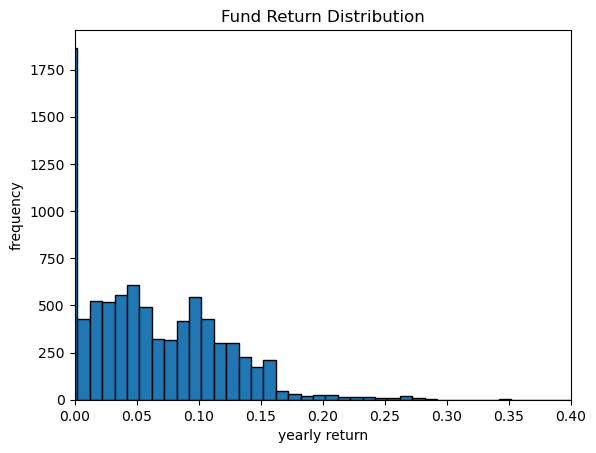

In [11]:
import matplotlib.pyplot as plt

bin_width = 0.01
num_bins = int((df['fund_return'].max() - df['fund_return'].min()) / bin_width)
ax = df['fund_return'].plot(kind='hist', bins=num_bins, edgecolor='k')
ax.set_xlim(0, 0.4)

# Add labels and a title
plt.xlabel('yearly return')
plt.ylabel('frequency')
plt.title('Fund Return Distribution')

# Show the plot
plt.show() 

The fund return we can see that it somewhat ensembles a exponential distribution, this makes sense as it is loginal that the average fund returns like a 10% per year (which is the standard) and there are outlier as seen. We can see some funds which return more than 30% and we will study if those are because of they are taking huges amounts of risk.

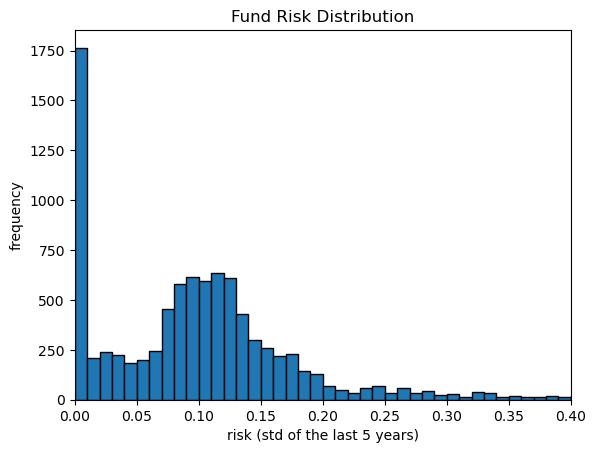

In [12]:
bin_width = 0.01
num_bins = int((df['fund_risk'].max() - df['fund_risk'].min()) / bin_width)
ax = df['fund_risk'].plot(kind='hist', bins=num_bins, edgecolor='k')
ax.set_xlim(0, 0.4)

# Add labels and a title
plt.xlabel('risk (std of the last 5 years)')
plt.ylabel('frequency')
plt.title('Fund Risk Distribution')

# Show the plot
plt.show() 

In the fund risk distribution, we can see that it is somewhat like a normal distribution and that makes sense. Most funds are average but there are some risky and some conservative funds.

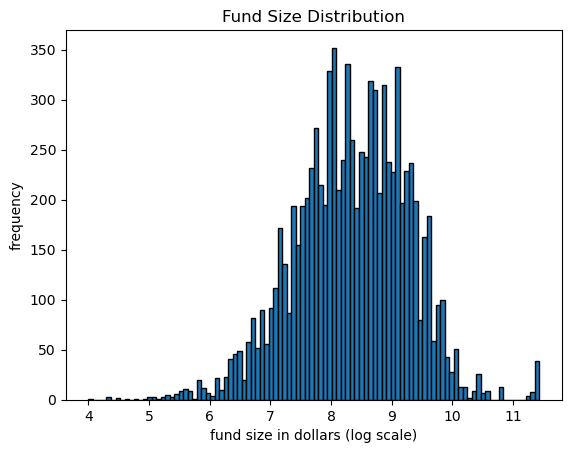

In [22]:
import numpy as np 

ax = np.log10(df['fund_size']).plot(kind='hist', bins=100, edgecolor='k')

# Add labels and a title
plt.xlabel('fund size in dollars (log 10 scale)')
plt.ylabel('frequency')
plt.title('Fund Size Distribution')

# Show the plot
plt.show() 

And lastly for the fund size we can see the they follow a normal ditribution which makes sense. And let's comprare this variables and see what it happens between them.

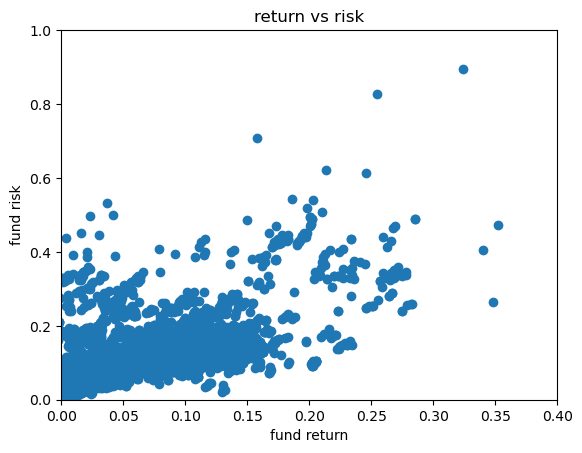

In [28]:
fig, ax = plt.subplots()
ax.scatter(df['fund_return'], df['fund_risk'])

ax.set_xlim(0, 0.4)
ax.set_ylim(0, 1)
# Add labels and a title
plt.xlabel('fund return')
plt.ylabel('fund risk')
plt.title('return vs risk')

# Show the plot
plt.show()

Here we can see the relationship between the return of a fund with their risk associated. We can see an uptrend relationship as it makes sense. The riskier the fund the more return it can be generate.

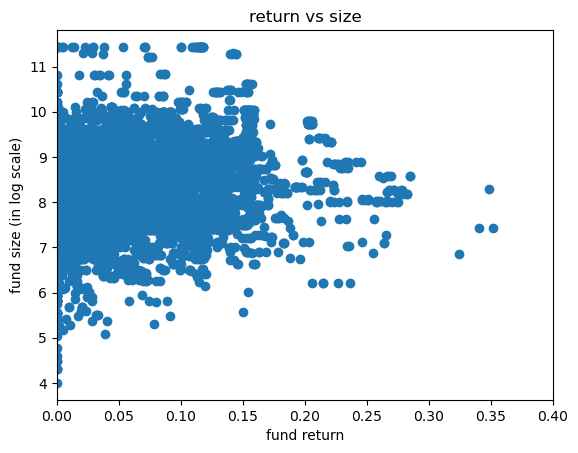

In [31]:
fig, ax = plt.subplots()
ax.scatter(df['fund_return'], np.log10(df['fund_size']))

ax.set_xlim(0, 0.4)
#ax.set_ylim(0, 1)
# Add labels and a title
plt.xlabel('fund return')
plt.ylabel('fund size (in log 10 scale)')
plt.title('return vs size')

# Show the plot
plt.show()

For the fund return vs the size we can see the the larger the fund, then the more conservative the fund is. This can be because the general population (most popular funds to invest) are more conservative as the normal person does not look for high returns with high risk, they look for stable investments.

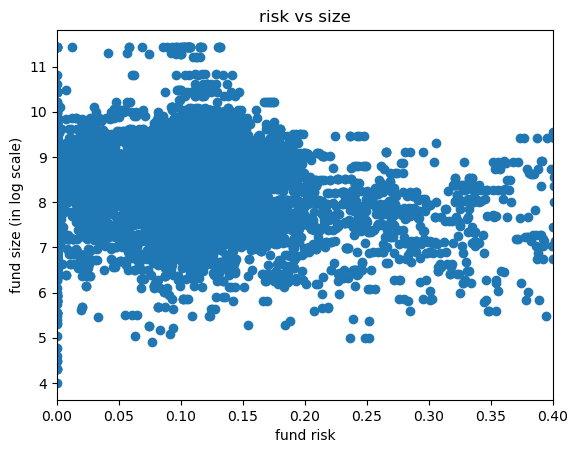

In [32]:
fig, ax = plt.subplots()
ax.scatter(df['fund_risk'], np.log10(df['fund_size']))

ax.set_xlim(0, 0.4)
#ax.set_ylim(0, 1)
# Add labels and a title
plt.xlabel('fund risk')
plt.ylabel('fund size (in log scale)')
plt.title('risk vs size')

# Show the plot
plt.show()

Finally, study the fund risk with the fund size, we see the same as the previous plot.

### Dataset Hypothesis

- The average return of a fund is 10%.
- The average risk associated to a fund is 10%, that is that usually we can expect a return between 0% and 20%.
- We can say, that the funds with the largest size, they are more conservative than the average.
- The funds that return the highest, they are riskier than the average

We will study more associations when we make different portfolios but in general, HIGH RISK HIGH REWARD.

# 1st Approach

In the first approach we will be creating portfolio allocations for differetn groups, according to their risk levels, years to retire, environmental corcerns, and assets sizes. For this we will be creating a python class, so we it is easier to study the groups. But first of all let's state the model that we want to optimize.

#### Sets
- Fund indexes (i): this will be our set so we can create parameters for each fund

#### Parameters
*Take care that all parameters are related to a specific fund*
- Return ($R_i$): this is the average return of the fund for the last 5 years
- Risk ($\sigma_i$): this is the standard deviation of the return of the last 5 years
- Fund Size ($F_i$): this is the total amount that the fund manages in dollars
- Management Fee ($M_i$): fee that the fund takes every year
- Dividend Yield ($D_i$): percentage of the fund price that it gives to their shareholders
- Asset Stock ($AS_i$): percentage of stocks a fund holds with respect to their assets
- Asset Bonds ($AB_i$): percentage of bonds a fund holds with respect to their assets
- Asset Cash ($AC_i$): percentage of cash a fund holds with respect to their assets
- Sustainability Rank ($S_i$): rank from 0 to 5 which indicates how sustainable the fund is

#### Variables
- Percentage to invest ($x_i$): percentage of the portfolio to invest in a specific fund

#### Objective Function
For this problem, we will maximize the total return of the entire portfolio, taking into account the avg return, dividend yield, and management fees of each of them.

$ max(\Sigma_{i = 0}^{N} {(R_i + D_i - M_i) * x_i})$

#### Constraints
- Budget: the sum of all investments cannot be larger than 100%. Formula:
$ \Sigma_{i = 0}^{N} {x_i} \leq 1$
- Maximum Risk: the average risk of the portfolio cannot be larger than a MAX_INVESTMENT_RISK (MIR). Formula:
$ \Sigma_{i = 0}^{N} {\sigma_i * x_i} \leq MIR$
- Maximum Allocation: the maximum percentage that can be invested in a specific fund cannot be larger than MAX_ALLOCATION (MA). Formula:
$ x_i \leq MA \forall i \in (0, N)$
- Minimum Fund Size: the average fund size of the portolio cannot be less than a MIN_FUND_SIZE (MiFS). Formula:
$ \Sigma_{i = 0}^{N} {F_i * x_i} \geq MiFS$
- Maximum Fund Size: the average fund size of the portolio cannot be higher than a MAX_FUND_SIZE (MaFS). Formula:
$ \Sigma_{i = 0}^{N} {F_i * x_i} \leq MaFS$
- Minimum Dividend Yield: the average dividend yield of the portolio cannot be less than a MIN_DIVIDEND_YIELD (MiDY). Formula:
$ \Sigma_{i = 0}^{N} {D_i * x_i} \geq MiDY$
- Maximum Dividend Yield: the average dividend yield of the portolio cannot be higher than a MAX_DIVIDEND_YIELD (MaDY). Formula:
$ \Sigma_{i = 0}^{N} {D_i * x_i} \leq MaDY$
- Minimum Asset Stock percentage: the minimum percentage of stocks a comany has cannot be less than a MIN_ASSET_STOCK (MiAS). Formula:
$ \Sigma_{i = 0}^{N} {AS_i * x_i} \geq MiAS$
- Maximum Asset Stock percentage: the maximum percentage of stocks a comany has cannot be higher than a MAX_ASSET_STOCK (MaAS). Formula:
$ \Sigma_{i = 0}^{N} {AS_i * x_i} \leq MaAS$
- Minimum Asset Bond percentage: the minimum percentage of bonds a comany has cannot be less than a MIN_ASSET_BOND (MiAB). Formula:
$ \Sigma_{i = 0}^{N} {AB_i * x_i} \geq MiAB$
- Maximum Asset Bond percentage: the maximum percentage of bonds a comany has cannot be higher than a MAX_ASSET_BOND (MaAB). Formula:
$ \Sigma_{i = 0}^{N} {AB_i * x_i} \leq MaAB$
- Minimum Asset Cash percentage: the minimum percentage of cash a comany has cannot be less than a MIN_ASSET_CASH (MiAC). Formula:
$ \Sigma_{i = 0}^{N} {AC_i * x_i} \geq MiAC$
- Maximum Asset Cash percentage: the maximum percentage of cash a comany has cannot be higher than a MAX_ASSET_CASH (MaAC). Formula:
$ \Sigma_{i = 0}^{N} {AC_i * x_i} \leq MaAC$
- Minimum Sustainability Rank: the minimum average rank of all the funds to invest cannot be less than a MIN_SUSTAINABILITY_RANK (MSR). Formula:
$ \Sigma_{i = 0}^{N} {S_i * x_i} \geq MSR$


In [30]:

from pyomo.environ import *

class Portfolio_Simple:
    def __init__(self, data, constraints):
        self.data = data
        self.constraints = constraints
        self.setup()

    def setup(self):
        self.model =  ConcreteModel()

        self.model.Funds = Set(initialize = self.data.index, doc = "Funds")

        self.model.Return = Param(self.model.Funds, initialize = self.data["fund_return"].to_dict(), doc="Return")
        self.model.Risk = Param(self.model.Funds, initialize = self.data["fund_risk"].to_dict(), doc="Risk")
        self.model.FundSize = Param(self.model.Funds, initialize = self.data["fund_size"].to_dict(), doc="Fund Size")
        self.model.MgnFee = Param(self.model.Funds, initialize = self.data["management_fees"].to_dict(), doc="Management Fees")
        self.model.DivYield = Param(self.model.Funds, initialize = self.data["dividend_yield_factor"].to_dict(), doc="Dvidend Yield")
        self.model.AssetStockPercentage = Param(self.model.Funds, initialize = self.data["asset_stock"].to_dict(), doc="Asset Stock Percentage")
        self.model.AssetBondPercentage = Param(self.model.Funds, initialize = self.data["asset_bond"].to_dict(), doc="Asset Bond Percentage")
        self.model.AssetCashPercentage = Param(self.model.Funds, initialize = self.data["asset_cash"].to_dict(), doc="Asset Cash Percentage")
        self.model.SustainabilityRank = Param(self.model.Funds, initialize = self.data["sustainability_rank"].to_dict(), doc="Sustainability Rank")

        self.model.x = Var(self.model.Funds, within=NonNegativeReals)

        def profit_rule(model):
            return sum((model.Return[i] + model.DivYield[i] - model.MgnFee[i])*model.x[i] for i in model.Funds)
        self.model.obj = Objective(rule=profit_rule, sense = maximize, doc = "Total revenue")
        
        self.setup_constraints()
    
    def setup_constraints(self):
        def budget_constraint(model):
            return (sum(model.x[i] for i in model.Funds) <= 1)
        self.model.budget = Constraint(rule=budget_constraint,doc="Maximum allocation is 100%")

        def max_risk_constraint(model):
            return sum(model.Risk[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_INVESTMENT_RISK"]
        self.model.max_risk = Constraint(rule=max_risk_constraint,doc="Investment risk")

        def max_allocation_constraint(model, fund):
            return (model.x[fund] <= self.constraints["MAX_ALLOCATION"])
        self.model.max_allocation = Constraint(self.model.Funds, rule=max_allocation_constraint, doc="Max allocation for a fund")

        def min_fund_size_constraint(model):
            return (sum(model.FundSize[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_FUND_SIZE"])
        self.model.min_fund_size = Constraint(rule=min_fund_size_constraint,doc="Min fund size")

        def max_fund_size_constraint(model):
            return (sum(model.FundSize[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_FUND_SIZE"])
        self.model.max_fund_size = Constraint(rule=max_fund_size_constraint,doc="Max fund size")

        def min_dividend_yield_factor_constraint(model):
            return (sum(model.DivYield[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_DIVIDEND_YIELD_FACTOR"])
        self.model.min_divided_yield = Constraint(rule=min_dividend_yield_factor_constraint,doc="Min dividend yield")

        def max_dividend_yield_factor_constraint(model):
            return (sum(model.DivYield[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_DIVIDEND_YIELD_FACTOR"])
        self.model.max_divided_yield = Constraint(rule=max_dividend_yield_factor_constraint,doc="Max dividend yield")

        def min_asset_stock_constraint(model):
            return (sum(model.AssetStockPercentage[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_ASSET_STOCK"])
        self.model.min_asset_stock = Constraint(rule=min_asset_stock_constraint,doc="Min asset stock")

        def max_asset_stock_constraint(model):
            return (sum(model.AssetStockPercentage[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_ASSET_STOCK"])
        self.model.max_asset_stock = Constraint(rule=max_asset_stock_constraint,doc="Max asset stock")

        def min_asset_bond_constraint(model):
            return (sum(model.AssetBondPercentage[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_ASSET_BOND"])
        self.model.min_asset_bond = Constraint(rule=min_asset_bond_constraint,doc="Min asset bond")

        def max_asset_bond_constraint(model):
            return (sum(model.AssetBondPercentage[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_ASSET_BOND"])
        self.model.max_asset_bond = Constraint(rule=max_asset_bond_constraint,doc="Max asset bond")

        def min_asset_cash_constraint(model):
            return (sum(model.AssetBondPercentage[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_ASSET_CASH"])
        self.model.min_asset_cash = Constraint(rule=min_asset_cash_constraint,doc="Min asset cash")

        def max_asset_cash_constraint(model):
            return (sum(model.AssetBondPercentage[i] * model.x[i] for i in model.Funds) <= self.constraints["MAX_ASSET_CASH"])
        self.model.max_asset_cash = Constraint(rule=max_asset_cash_constraint,doc="Max asset cash")

        def min_sustainability_rank_constraint(model):
            return (sum(model.SustainabilityRank[i] * model.x[i] for i in model.Funds) >= self.constraints["MIN_SUSTAINABILITY_RANK"])
        self.model.min_sustainability_rank = Constraint(rule=min_sustainability_rank_constraint,doc="Min sustainability rank")

    def solve(self):
        solver = SolverFactory('glpk')

        results = solver.solve(self.model)

        print(self.model.obj())
            

In [31]:

test = df.loc[1:10]
constraints = {
    "MAX_INVESTMENT_RISK": 0.2,
    "MAX_ALLOCATION": 0.3,
    "MIN_FUND_SIZE": 0,
    "MAX_FUND_SIZE": 1e10,
    "MIN_DIVIDEND_YIELD_FACTOR": 0.01,
    "MAX_DIVIDEND_YIELD_FACTOR": 1,
    "MIN_ASSET_STOCK": 0,
    "MAX_ASSET_STOCK": 1,
    "MIN_ASSET_BOND": 0,
    "MAX_ASSET_BOND": 1,
    "MIN_ASSET_CASH": 0.2,
    "MAX_ASSET_CASH": 1,
    "MIN_SUSTAINABILITY_RANK": 2
}
portfolio = Portfolio_Simple(df, constraints)

In [32]:
portfolio.solve()

0.2845791109124271


In [ ]:
test = df.loc[1:10]
corr_matrix = test[sector_columns].T.corr()
corr_matrix = corr_matrix.fillna(0)

In [ ]:
model.pprint()

1 Set Declarations
    Funds : Funds
        Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

9 Param Declarations
    AssetBondPercentage : Asset Bond Percentage
        Size=10, Index=Funds, Domain=Any, Default=None, Mutable=False
        Key : Value
          1 :    0.0
          2 :    0.0
          3 : 0.9986
          4 : 0.9604
          5 : 0.9647
          6 :    0.0
          7 :    0.0
          8 :    0.0
          9 :    0.0
         10 :    0.0
    AssetCashPercentage : Asset Cash Percentage
        Size=10, Index=Funds, Domain=Any, Default=None, Mutable=False
        Key : Value
          1 :                0.0001
          2 :                0.0054
          3 : 0.0014000000000000002
          4 :               -0.0003
          5 :                0.0042
          6 :  0.006999999999999999
          7 :                0.0037
          8 :                   0.0
   

# EXTRA

 

In [ ]:

And now we will get the correlation matrix between the sector variables of the funds. This will tell us how related two funds are to each other and will allow us to make our portfolio more diversified so we don't end up with funds that are all from the same sector as this will be bad in the future if something bad happens to that sector.

SyntaxError: unterminated string literal (detected at line 1) (3619037012.py, line 1)

In [ ]:
#corr_matrix = df[sector_columns].T.corr()
#corr_matrix = corr_matrix.fillna(0)
#print(corr_matrix)

In [ ]:
# corr_matrix_pyomo = {}
# Iterate over the rows and columns of the correlation matrix
# for fund_i_index, fund_i in enumerate(corr_matrix.index):
#     print(fund_i_index)
#     for fund_j_index, fund_j in enumerate(corr_matrix.index):
#         print(fund_j)
#         print(corr_matrix)
#         corr_matrix_pyomo[(fund_i_index, fund_j_index)] = corr_matrix[fund_i_index, fund_j_index]
#         
# corr_matrix_pyomo"